# A Beginner's Guide to Time Series Prediction with LSTMs in Keras
## Author: Ali Al Bataineh, Ph.D.

Welcome to this beginner's tutorial on time series prediction using LSTMs in Keras! In this tutorial, I'll cover everything you need to know about using LSTM networks for predicting future values based on historical data. We'll walk through two examples: one with a single feature and another with multiple features. Let's jump right in and get started!

## Table of Contents

1. Introduction to Time Series
2. What is an LSTM?
3. Getting Started with Keras
4. Example 1: Time Series Prediction with a Single Feature
5. Example 2: Time Series Prediction with Multiple Features
6. Conclusion

## 1. Introduction to Time Series
### 1.1 Time series
A time series is a collection of data points recorded in a specific order over time. In other words, it's a sequence of data where the order matters, as it reflects the progression of time. Each data point in a time series is associated with a timestamp, which indicates when the data point was observed or recorded. Time series data can be found in various fields, such as finance (stock prices, exchange rates), weather (temperature, precipitation), healthcare (patient vital signs), and many more.

### 1.2 Time series prediction
Time series prediction, also known as forecasting, is the process of using historical data to predict future values in a time series. The main goal is to identify patterns and trends in the historical data and use them to estimate what the future values might look like. This can be useful for making informed decisions, planning, and optimizing processes. For example, businesses may use time series prediction to forecast future sales or inventory levels, while meteorologists may use it to predict future weather conditions.  


In time series prediction, we use various techniques and algorithms to model the underlying structure of the data. These techniques can range from simple statistical methods, such as moving averages and exponential smoothing, to more complex machine learning approaches, like autoregressive integrated moving average (ARIMA) models and deep learning techniques, such as recurrent neural networks (RNNs) and Long Short-Term Memory (LSTM) networks.  


*In this tutorial, we focus on using LSTMs with Keras, a popular deep learning library, to predict future values in a time series. LSTMs are a powerful tool for capturing complex patterns and long-term dependencies in time series data, making them well-suited for this task.*

## 2. What is an LSTM?
Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) designed to handle sequences of data. Unlike traditional feedforward neural networks, RNNs have loops that allow them to maintain a "memory" of previous inputs. This makes them suitable for tasks involving sequences, such as time series prediction.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/The_LSTM_cell.png/1920px-The_LSTM_cell.png" alt="LSTM Diagram" width="50%" height="50%">
<p><em>Figure 1: LSTM cell diagram. Source: <a href="https://en.wikipedia.org/wiki/Long_short-term_memory#/media/File:The_LSTM_cell.png">Wikipedia</a></em></p>


LSTMs, in particular, are a special kind of RNN that can learn long-term dependencies in the data, making them more effective in capturing complex patterns in time series data. The key to this ability is the LSTM cell, which consists of several gates: the input gate, the forget gate, and the output gate. These gates help the LSTM decide what information to store, forget, and use for making predictions.  

Mathematically, the LSTM cell can be defined using the following equations:
1. Input gate:
$$
i_t=\sigma\left(W_i x_t+U_i h_{t-1}+b_i\right)
$$
2. Forget gate:
$$
f_t=\sigma\left(W_f x_t+U_f h_{t-1}+b_f\right)
$$
3. Cell state update:
$$
\begin{aligned}
& \bar{c}_t=\tanh \left(W_c x_t+U_c h_{t-1}+b_c\right) \\
& c_t=f_t \odot c_{t-1}+i_t \odot \tilde{c}_t
\end{aligned}
$$
4. Output gate:
$$
o_t=\sigma\left(W_o x_t+U_o h_{t-1}+b_o\right)
$$
5. Hidden state update:
$$
h_t=o_t \odot \tanh \left(c_t\right)
$$
Here,

- $i_t$, $f_t$, $o_t$ are the input, forget, and output gates, respectively.
- $x_t$ is the input at time step $t$.
- $h_{t-1}$ is the hidden state at time step $t-1$.
- $c_t$ is the cell state at time step $t$.
- $W$, $U$, and $b$ are the weight matrices and bias vectors for each gate.
- $\sigma$ is the sigmoid activation function.
- $\odot$ denotes element-wise multiplication.  

These equations help the LSTM learn complex dependencies in the data while mitigating the vanishing gradient problem, which is a common issue in standard RNNs. By incorporating the LSTM cell into your model, you can tackle challenging time series prediction tasks with better accuracy and performance.

## Getting Started with Keras
Keras is a high-level neural networks library, written in Python, and designed to be user-friendly and modular. It's built on top of TensorFlow and provides a simple way to define, train, and use deep learning models. In this tutorial, we'll use Keras to build and train our LSTM models for time series prediction.

### 3.1 Installing Keras and TensorFlow
To get started, you'll need to install Keras and TensorFlow. You can do this using pip, the Python package manager. Open a terminal or command prompt and run the following command:

**pip install tensorflow keras**
- This will install both TensorFlow and Keras in your Python environment.

### 3.2 Model Type
In this tutorial, we'll be using the Sequential model from Keras, which is a linear stack of layers that can be easily created by passing a list of layers to the Sequential constructor. The Sequential model is suitable for most time series prediction tasks, as it allows us to build models with one or more LSTM layers followed by a Dense output layer for making predictions.

The main components of our LSTM model in this tutorial are:

1. LSTM layer: The LSTM layer is the heart of our model, responsible for learning the patterns in the time series data. It is a type of recurrent layer that can handle sequences of data and learn long-term dependencies.

2. Dense layer: The Dense layer, also known as the fully connected layer, is used to produce the output of the model. It takes the hidden state from the LSTM layer and generates the predicted output.  


By combining these two layers, we'll create an LSTM model that can effectively learn patterns in time series data and make accurate predictions for future values.

# 4. Example 1: Time Series Prediction with a Single Feature
In this example, we'll predict future temperature values based on a historical sequence of temperatures. Our dataset is a small list of 5 temperature samples (in degrees Celsius): [10, 15, 20, 25, 30].

## 4.1 Preprocessing the Dataset
First, let's preprocess the dataset by creating input-output pairs for training. We'll use a sliding window approach to create the training dataset. For simplicity, let's use a window size of 2 (i.e., we'll use the 2 previous samples to predict the next one).  


The input-output pairs for the training dataset would look like this:  
Input: [10, 15] -> Output: [20]  

Input: [15, 20] -> Output: [25]  

Input: [20, 25] -> Output: [30]

## 4.2 Building the LSTM Model
Now, let's create a simple LSTM model using Keras. To do this, we'll follow these steps:

1. Create a Keras Sequential model.
2. Add an LSTM layer with 50 units and ReLU activation.
3. Add a Dense output layer with 1 unit and a linear activation function (since we want to predict a single number for a regression task). In Keras, when you don't specify an activation function for a Dense layer, it uses the linear activation function by default, which means we want the raw output value without any transformation.
4. Compile the model using the Adam optimizer and mean squared error loss function.  

Before diving into the code, let's understand the input data shape requirements for LSTMs in Keras. LSTMs expect input data in the shape of a 3-dimensional array with dimensions:

- batch_size: The number of samples in a batch.
- time_steps: The number of time steps (or sequence length) in each input sample.
- features: The number of features in each time step.  

In our example, we have:
- batch_size: 3 (since we have 3 input samples)
- time_steps: 2 (since we're using a window of size 2)
- features: 1 (since we have only one feature per time step, the value itself)
So, we need to reshape our 2D input array into a 3D array with the shape (batch_size, time_steps, features). Then, we'll set the input_shape parameter in the LSTM layer to (time_steps, features).


In [2]:
# Here is the final model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Set the random seeds
np.random.seed(42)
tf.random.set_seed(42)
#By setting the random seeds for both NumPy and TensorFlow, you should get the same results every time you run the model.
#This ensures that the random number generation used in weight initialization and other processes will be the same in each run.

# Preprocess the dataset
data = np.array([10, 20, 30, 40, 50], dtype=float)
window_size = 2
X = []
y = []

for i in range(len(data) - window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])

X = np.array(X).reshape(-1, window_size, 1)  # Reshape input to (batch_size, window_size, feature_size)
y = np.array(y)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

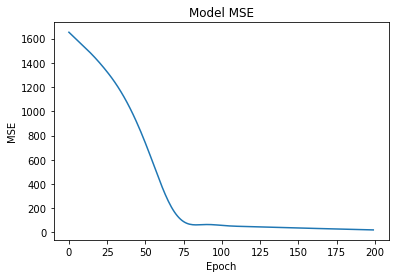

In [3]:
# Train the model
history = model.fit(X, y, epochs=200, verbose=0)

# Plot the MSE during training
plt.plot(history.history['loss'])
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [4]:
# Make a prediction
#Finally, let's make a prediction for the next temperature value using the last two temperature values [20, 25] as input
input_data = np.array([20, 25]).reshape(1, window_size, 1) 
# We reshape the input data into a 3D array with the shape (1, window_size, 1) to match the expected input shape of the model.
predicted_temperature = model.predict(input_data)
print(predicted_temperature)


[[36.599308]]


The true output for the input sequence of [20, 25] is 30, but the model prediction is 36.59. The error in the model's prediction, which is the difference between the true output (30) and the predicted output (36.59), occurs because the LSTM model hasn't fully captured the underlying pattern in the data. Several factors can contribute to this error:

1. Limited training data: With only a few data points, it can be challenging for the model to learn the underlying pattern accurately. The more data available for training, the better the model can learn the true relationship between input and output values.  


2. Model architecture: The choice of the number of LSTM units, activation functions, layers, learning rate, batch size, and the number of training epochs can impact the model's ability to learn the data pattern. Tweaking the architecture could lead to better predictions.  


3. Randomness: Neural networks, including LSTMs, use random initialization of weights and biases. This randomness can result in different predictions in different runs, even with the same data and model configuration.

## 5. Example 2: Time Series Prediction with Multiple Features
In this example, we'll predict future temperature and humidity values based on historical sequences of temperature and humidity data. Our dataset has two features per time step:  
Temperature: [10, 15, 20, 25, 30]  

Humidity:    [30, 35, 40, 45, 50]


## 5.1 Preprocessing the Dataset
We'll preprocess the dataset using the same sliding window approach as before, but this time we have two features (temperature and humidity) per time step.  


The input-output pairs for the training dataset would look like this:  

Input: [[10, 30], [15, 35]] -> Output: [[20, 40]]  

Input: [[15, 35], [20, 40]] -> Output: [[25, 45]]  

Input: [[20, 40], [25, 45]] -> Output: [[30, 50]]


## 5.2 Building the LSTM Model
The LSTM model for this example is very similar to the previous one. The only difference is that we now have 2 features per time step, so the input_shape of the LSTM layer is (window_size, 2).

In [5]:
#Now, let's create and train an LSTM model using Keras:
# No need to import the libraraies again 
# Set the random seeds
np.random.seed(42)
tf.random.set_seed(42)
# Preprocess the dataset
temperature = np.array([10, 15, 20, 25, 30], dtype=float)
humidity = np.array([30, 35, 40, 45, 50], dtype=float)

window_size = 2
X = []
y = []

for i in range(len(temperature) - window_size):
    X.append(np.column_stack((temperature[i:i+window_size], humidity[i:i+window_size])))
    y.append(np.column_stack((temperature[i+window_size], humidity[i+window_size])))

X = np.array(X)  # Shape: (3, 2, 2)
y = np.array(y)  # Shape: (3, 2)

The input data X is now in the correct 3D format for the LSTM layer in Keras, with dimensions (batch_size, time_steps, features). There is no need to reshape it further. The output data y is a 2D array with dimensions (batch_size, features), which is also in the correct format for training the model.

In [6]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

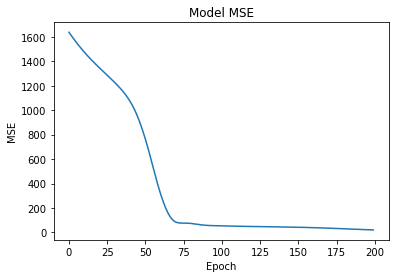

In [7]:
# Train the model
history = model.fit(X, y, epochs=200, verbose=0)

# Plot the MSE during training
plt.plot(history.history['loss'])
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [8]:
# Make a prediction
last_temperature_values = np.array([15, 35], dtype=float)
last_humidity_values = np.array([20, 40], dtype=float)
input_data = np.column_stack((last_temperature_values, last_humidity_values)).reshape(1, window_size, 2)
predicted_value = model.predict(input_data)
print("Predicted temperature and humidity:", predicted_value)

Predicted temperature and humidity: [[22.570066 42.646614]]


In this example, the true output for the input sequence [[15, 35], [20, 40]] is [[25, 45]], which represents the next temperature and humidity values in the sequence. However, the model predicted [[22.57, 42.64]], which is not exactly the same as the true output.

In simple terms, the LSTM model has learned an approximation of the relationship between the input sequence of temperature and humidity values and the next temperature and humidity values in the sequence. The model's prediction is close, but not perfect, because it hasn't completely captured the underlying pattern in the data.

The error in the prediction can be attributed to factors such as limited training data, model architecture, and inherent randomness in neural networks. By addressing these factors and fine-tuning the model, you can potentially improve the prediction accuracy.

## 6. Conclusion
Congratulations, you've completed this beginner's tutorial on time series prediction using LSTMs in Keras! You've learned the basics of time series data, LSTMs, and how to use Keras to create and train LSTM models for time series prediction. We've covered two examples, one with a single feature and another with multiple features.

Now you're ready to apply these concepts to your own time series data and start making predictions. Remember that real-world problems often require more complex models and larger datasets, so don't hesitate to experiment with different model architectures and techniques to improve your predictions.Good luck, and happy learning!  

As you continue to explore the world of time series prediction and LSTMs, here are a few additional topics you may want to explore:

1. Different architectures for your LSTM models, such as adding more layers or increasing the number of units in the LSTM layers.

2. Tuning hyperparameters like learning rate, batch size, and the number of epochs to improve the performance of your LSTM models.

3. Regularization techniques like dropout or weight decay to prevent overfitting in your models.

4. Experimenting with other types of recurrent layers in Keras, such as GRU (Gated Recurrent Unit) or Bidirectional LSTM layers.

5. Employing techniques like teacher forcing, sequence-to-sequence models, or attention mechanisms to handle more complex time series prediction tasks.

6. Exploring other deep learning libraries like PyTorch, MXNet, or CNTK to see how they compare to Keras in terms of functionality and ease of use.  

By diving into these topics, you'll gain a deeper understanding of time series prediction, LSTM networks, and deep learning as a whole. This knowledge will help you become more proficient in tackling real-world time series prediction problems and building high-quality models that deliver accurate predictions. Keep experimenting, learning, and growing your skills as a data scientist or machine learning engineer.